# Exploratory Data Analysis (EDA)

## 1.0 Import require Packages and Functions

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from utils import preprocess_text

text_df = pd.read_csv("./df_file.csv")

X = text_df['Text']
y = text_df['Label']

preprocessed_texts = [preprocess_text(text) for text in X]

ValueError: The following variable cannot be assigned with wide-form data: `hue`

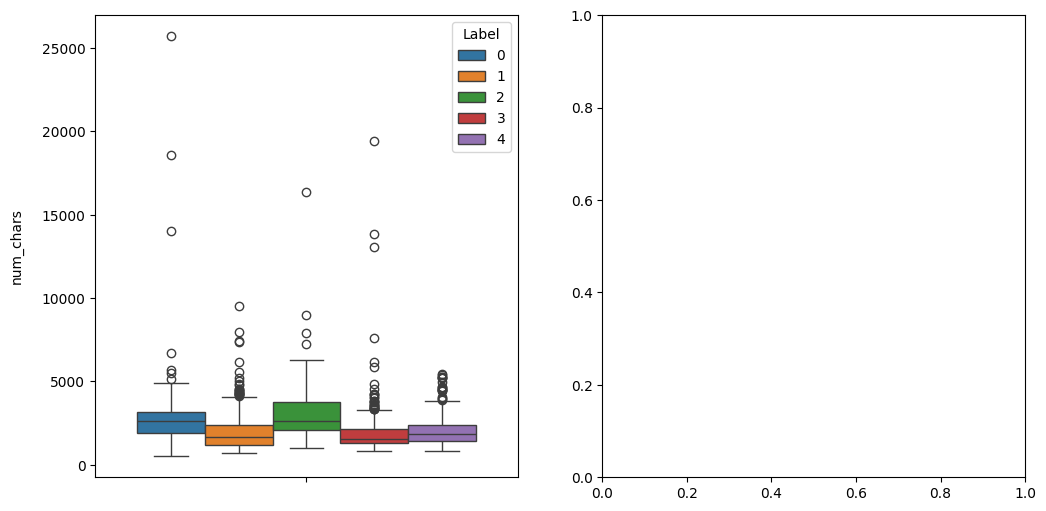

In [30]:
# Function to calculate the required metrics
def text_metrics(text):
    num_chars = len(text)
    words = text.split()
    num_words = len(words)
    mean_word_length = np.mean([len(word) for word in words])
    sentences = text.split('.')
    mean_sentence_length = np.mean([len(sentence.split()) for sentence in sentences if sentence])
    return num_chars, num_words, mean_word_length, mean_sentence_length

# Apply the function to each text entry
text_df[['num_chars', 'num_words', 'mean_word_length', 'mean_sentence_length']] = X.apply(lambda text: pd.Series(text_metrics(text)))

# Convert Label column to categorical type
text_df['Label'] = text_df['Label'].astype('category')

# Function to visualize the data
def visualize(col, data):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[col], hue=data['Label'])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[col], hue=text_df['Label'])
    plt.legend(data['Label'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

# Example of how to call the visualize function
visualize('num_chars', text_df)
visualize('num_words', text_df)
visualize('mean_word_length', text_df)
visualize('mean_sentence_length', text_df)


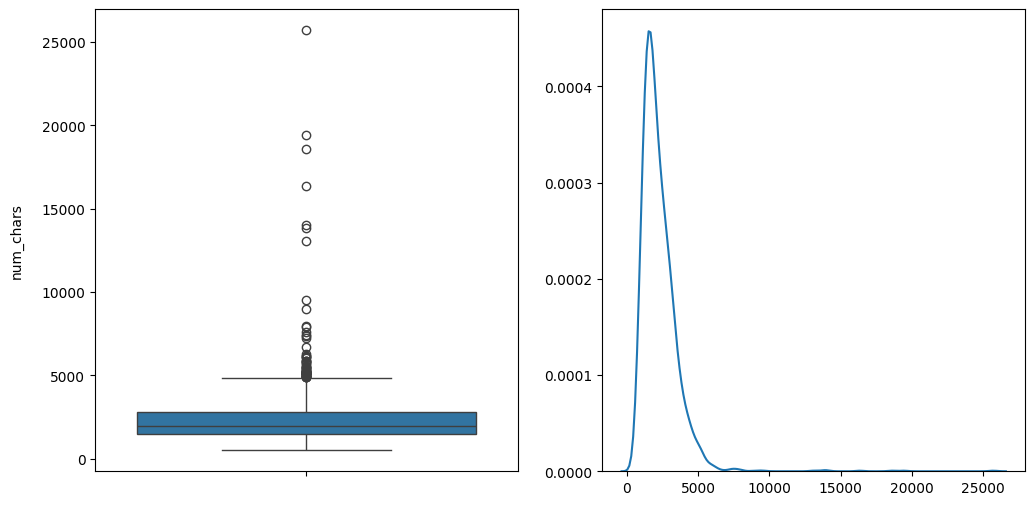

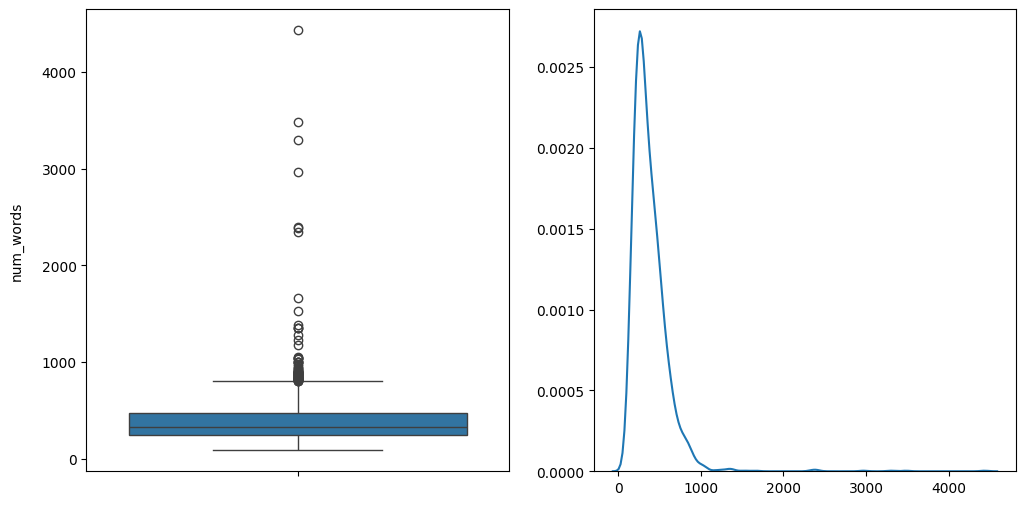

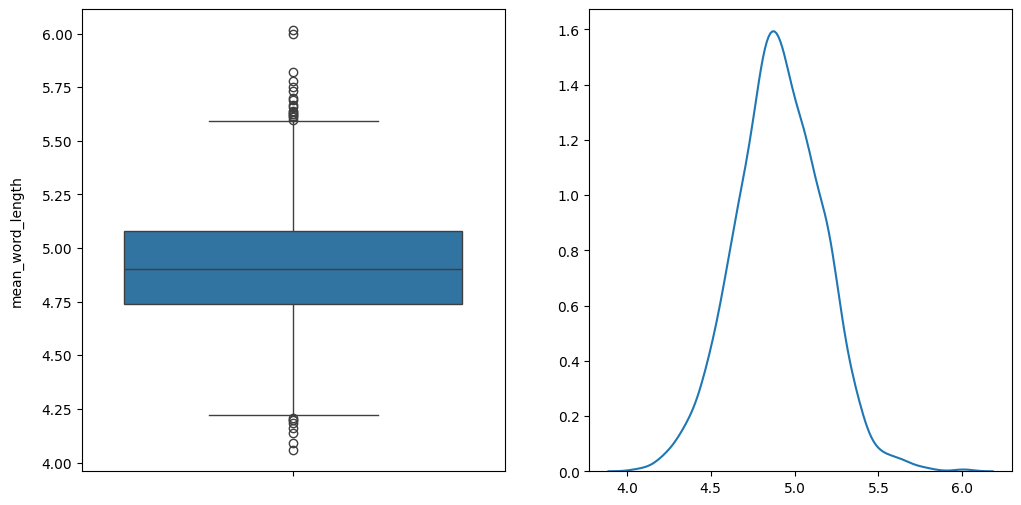

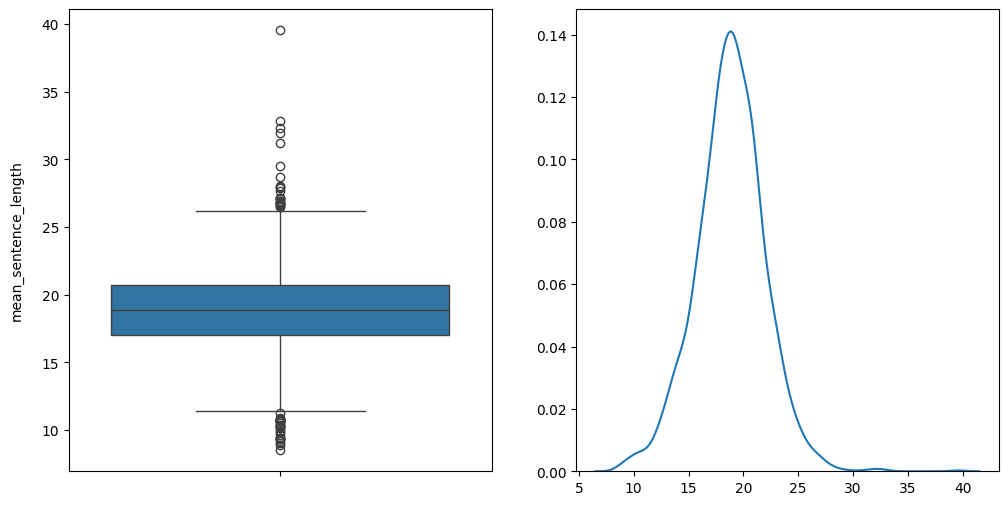

In [23]:
import numpy as np
# Function to calculate the required metrics
def text_metrics(text):
    num_chars = len(text)
    words = text.split()
    num_words = len(words)
    mean_word_length = np.mean([len(word) for word in words])
    sentences = text.split('.')
    mean_sentence_length = np.mean([len(sentence.split()) for sentence in sentences if sentence])
    return num_chars, num_words, mean_word_length, mean_sentence_length

# Apply the function to each text entry
text_df[['num_chars', 'num_words', 'mean_word_length', 'mean_sentence_length']] = X.apply(lambda text: pd.Series(text_metrics(text)))

# Function to visualize the data
def visualize(col, data):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[col])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[col])
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

# Example of how to call the visualize function
visualize('num_chars', text_df)
visualize('num_words', text_df)
visualize('mean_word_length', text_df)
visualize('mean_sentence_length', text_df)

#print(text_df.head())

## 1.1 Top 20 Most Common Words

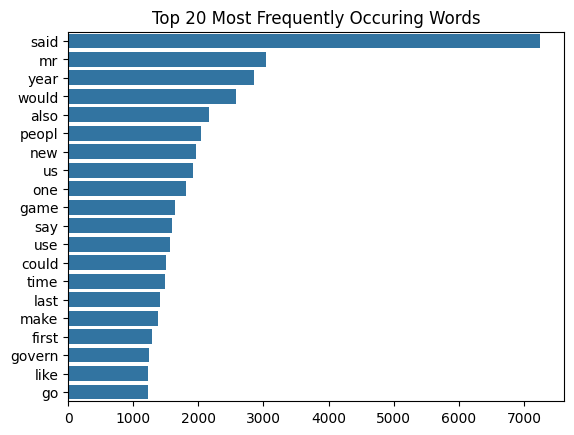

In [9]:
preprocessed_data = pd.DataFrame(preprocessed_texts, columns=['Text'])

cnt = Counter()
for text in preprocessed_data['Text'].values:
    for word in text.split():
        cnt[word] += 1
        
words = []
freq = []
for word, count in cnt.most_common(20):
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 20 Most Frequently Occuring Words')
plt.show()

## 1.2 Top 10 Most Common Bi-grams

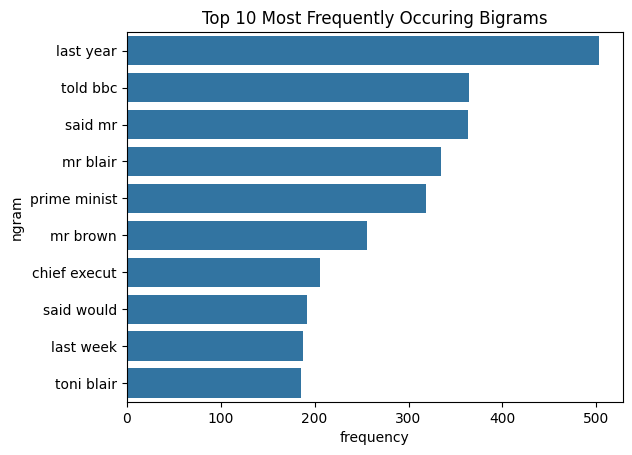

In [10]:
# Checking most frequent Bi-grams
cv2 = CountVectorizer(ngram_range=(2,2))
bigrams = cv2.fit_transform(preprocessed_texts)

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv2.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

## 1.3 Top 10 Most Common Tri-grams

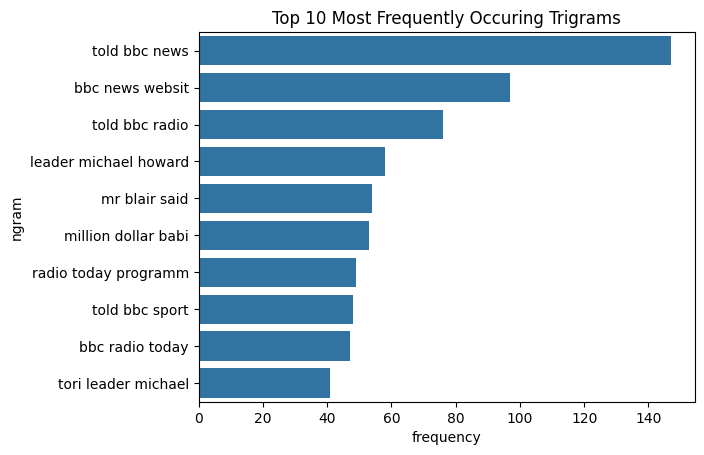

In [11]:
# Checking most frequent Tri-grams
cv3 = CountVectorizer(ngram_range=(3,3))
trigrams  = cv3.fit_transform(preprocessed_texts)

count_values = trigrams .toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv3.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

## 1.4 Classification Distribution

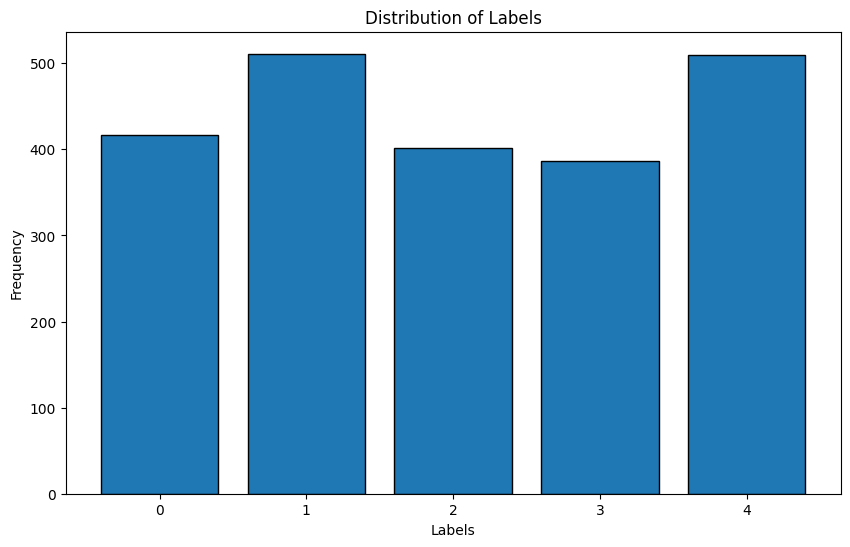

In [17]:
# Count the frequency of each label
label_counts = y.value_counts().sort_index()

# Plot the distribution of labels as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, edgecolor='black')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.xticks(range(5))
plt.show()